In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [3]:
# xóa những trường bị NAN data
df = df.dropna()
print(df.shape)

(699, 2)


In [4]:
df = df.values
X = df[:,:1]
Y = df[:,1:]
print(X.shape,Y.shape)

(699, 1) (699, 1)


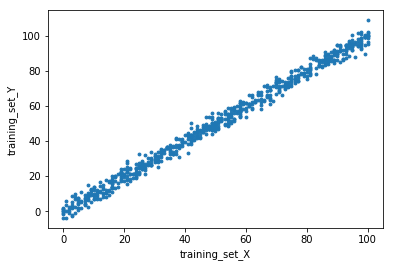

In [5]:
plt.scatter(X,Y,s=8)
plt.xlabel('training_set_X')
plt.ylabel('training_set_Y')
plt.show()

In [6]:
ones = np.ones_like(Y)
X = np.concatenate((X,ones),axis=1)
X.shape

(699, 2)

In [7]:
theta = np.random.normal(size=2).reshape([2,1])
theta

array([[1.49817508],
       [0.12739107]])

In [8]:
def predict(X,Theta):
    return X.dot(Theta)

In [9]:
def loss(X,Y,Theta,m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """
    return ( 1/(2*m) ) * np.sum((Y-X.dot(Theta))**2)

In [10]:
def grad(X,Y,theta,m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """ 
    g = 1/m * X.T.dot(X.dot(theta) - Y)
    return g.reshape(theta.shape)

In [11]:
def liner_grad(X,Y,theta,learning_rate,m):
    loss_list=[]
    for i in range(0,1000):
        grad_value = grad(X,Y,theta,m)
        theta = theta -learning_rate*grad_value
        loss_list.append(loss(X,Y,theta,m))
    return theta,loss_list

In [12]:
m = len(Y)
print(m)
learning_rate = 0.0001
loss_list = []
theta,loss_list = liner_grad(X,Y,theta,learning_rate,m)
theta

699


array([[0.9973375 ],
       [0.11426245]])

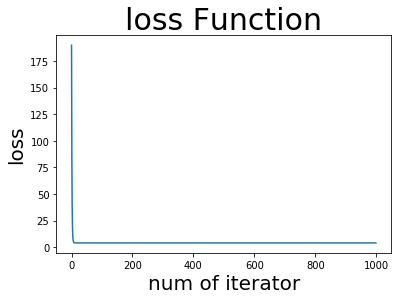

In [13]:
plt.title('loss Function', size = 30)
plt.xlabel('num of iterator', size = 20)
plt.ylabel('loss', size = 20)
plt.plot(loss_list)
plt.show()

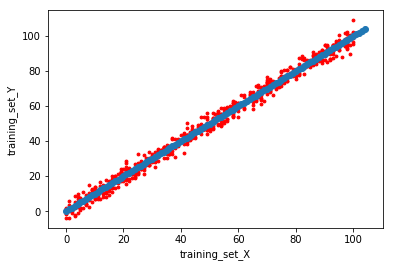

In [14]:
linex = [i for i in range(0,105)]
liney = [i*theta[0,0]+ theta[1,0] for i in range(0,105)]
plt.scatter(df[:,:1],df[:,1:],s=8,c='r')
plt.scatter(linex,liney)
plt.xlabel('training_set_X')
plt.ylabel('training_set_Y')
plt.show()

# TEST

In [20]:
data_test = pd.read_csv('test.csv')
data_test = data_test.dropna()
data_test = data_test.values
X_test = data_test[:,:1]
Y_test = data_test[:,1:]

In [21]:
for a,b in zip(X_test[:],Y_test[:]):
    print('x test: {0}, thuc te : {1}, du doan : {2}'.format(a,b,a*theta[0,0]+theta[1,0]))

x test: [77.], thuc te : [79.77515201], du doan : [76.9092503]
x test: [21.], thuc te : [23.17727887], du doan : [21.05835005]
x test: [22.], thuc te : [25.60926156], du doan : [22.05568755]
x test: [20.], thuc te : [17.85738813], du doan : [20.06101254]
x test: [36.], thuc te : [41.84986439], du doan : [36.01841262]
x test: [15.], thuc te : [9.80523488], du doan : [15.07432502]
x test: [62.], thuc te : [58.87465933], du doan : [61.94918774]
x test: [95.], thuc te : [97.61793701], du doan : [94.86132539]
x test: [20.], thuc te : [18.39512747], du doan : [20.06101254]
x test: [5.], thuc te : [8.74674765], du doan : [5.10094998]
x test: [4.], thuc te : [2.81141583], du doan : [4.10361247]
x test: [19.], thuc te : [17.09537241], du doan : [19.06367504]
x test: [96.], thuc te : [95.14907176], du doan : [95.85866289]
x test: [62.], thuc te : [61.38800663], du doan : [61.94918774]
x test: [36.], thuc te : [40.24701716], du doan : [36.01841262]
x test: [15.], thuc te : [14.82248589], du doan 